# Yolov8s on pretrain model

In [1]:
!nvidia-smi

Tue Feb 13 10:56:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
home = os.getcwd()
print(home)


/content


In [3]:
!pip install ultralytics==8.0.2


In [4]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image


In [6]:
%cd {home}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


/content
2024-02-13 10:56:27.353480: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 10:56:27.353523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 10:56:27.355030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 10:56:28.378385: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 param

/content


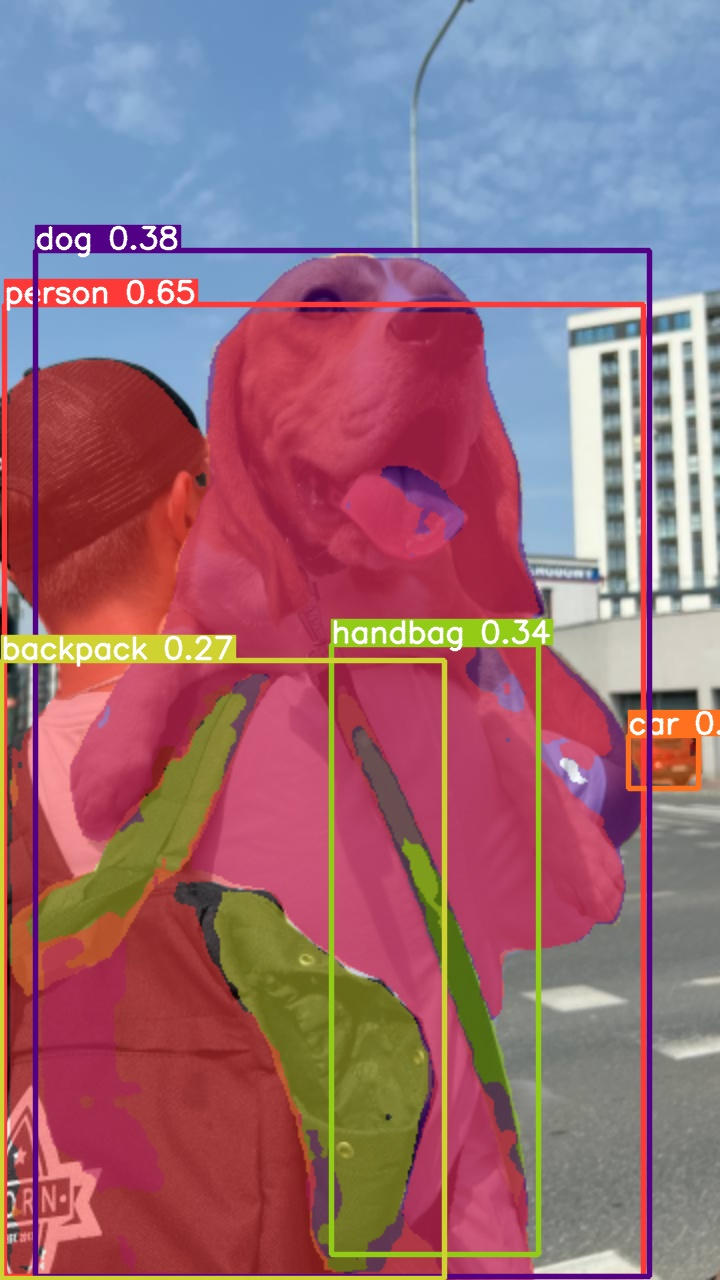

In [7]:
%cd {home}
Image(filename= "runs/segment/predict2/dog.jpeg", height=600)


In [8]:
model = YOLO(f'{home}/yolov8s-seg.pt')
results = model.predict(source="https://media.roboflow.com/notebooks/examples/dog.jpeg", conf=.25)

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 85.9ms
Speed: 0.6ms pre-process, 85.9ms inference, 624.7ms postprocess per image at shape (1, 3, 640, 640)


In [43]:
model = YOLO(f'{home}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 104k/104k [00:00<00:00, 27.5MB/s]
Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/Datasets/Dataset/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 14.6ms
Speed: 0.4ms pre-process, 14.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


# Yolov8s Training on custom data

## Mounting Drive



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
ROOT_PATH= '/content/drive/MyDrive/Colab Notebooks/Datasets/'
%cd {ROOT_PATH}

/content/drive/MyDrive/Colab Notebooks/Datasets


In [ ]:
!unzip Cell-seg.zip


## Training

In [11]:

%cd {ROOT_PATH}/Dataset

/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

In [22]:
!ls

cli.log  data.yaml  runs  test	train  valid  yolov8s-seg.pt


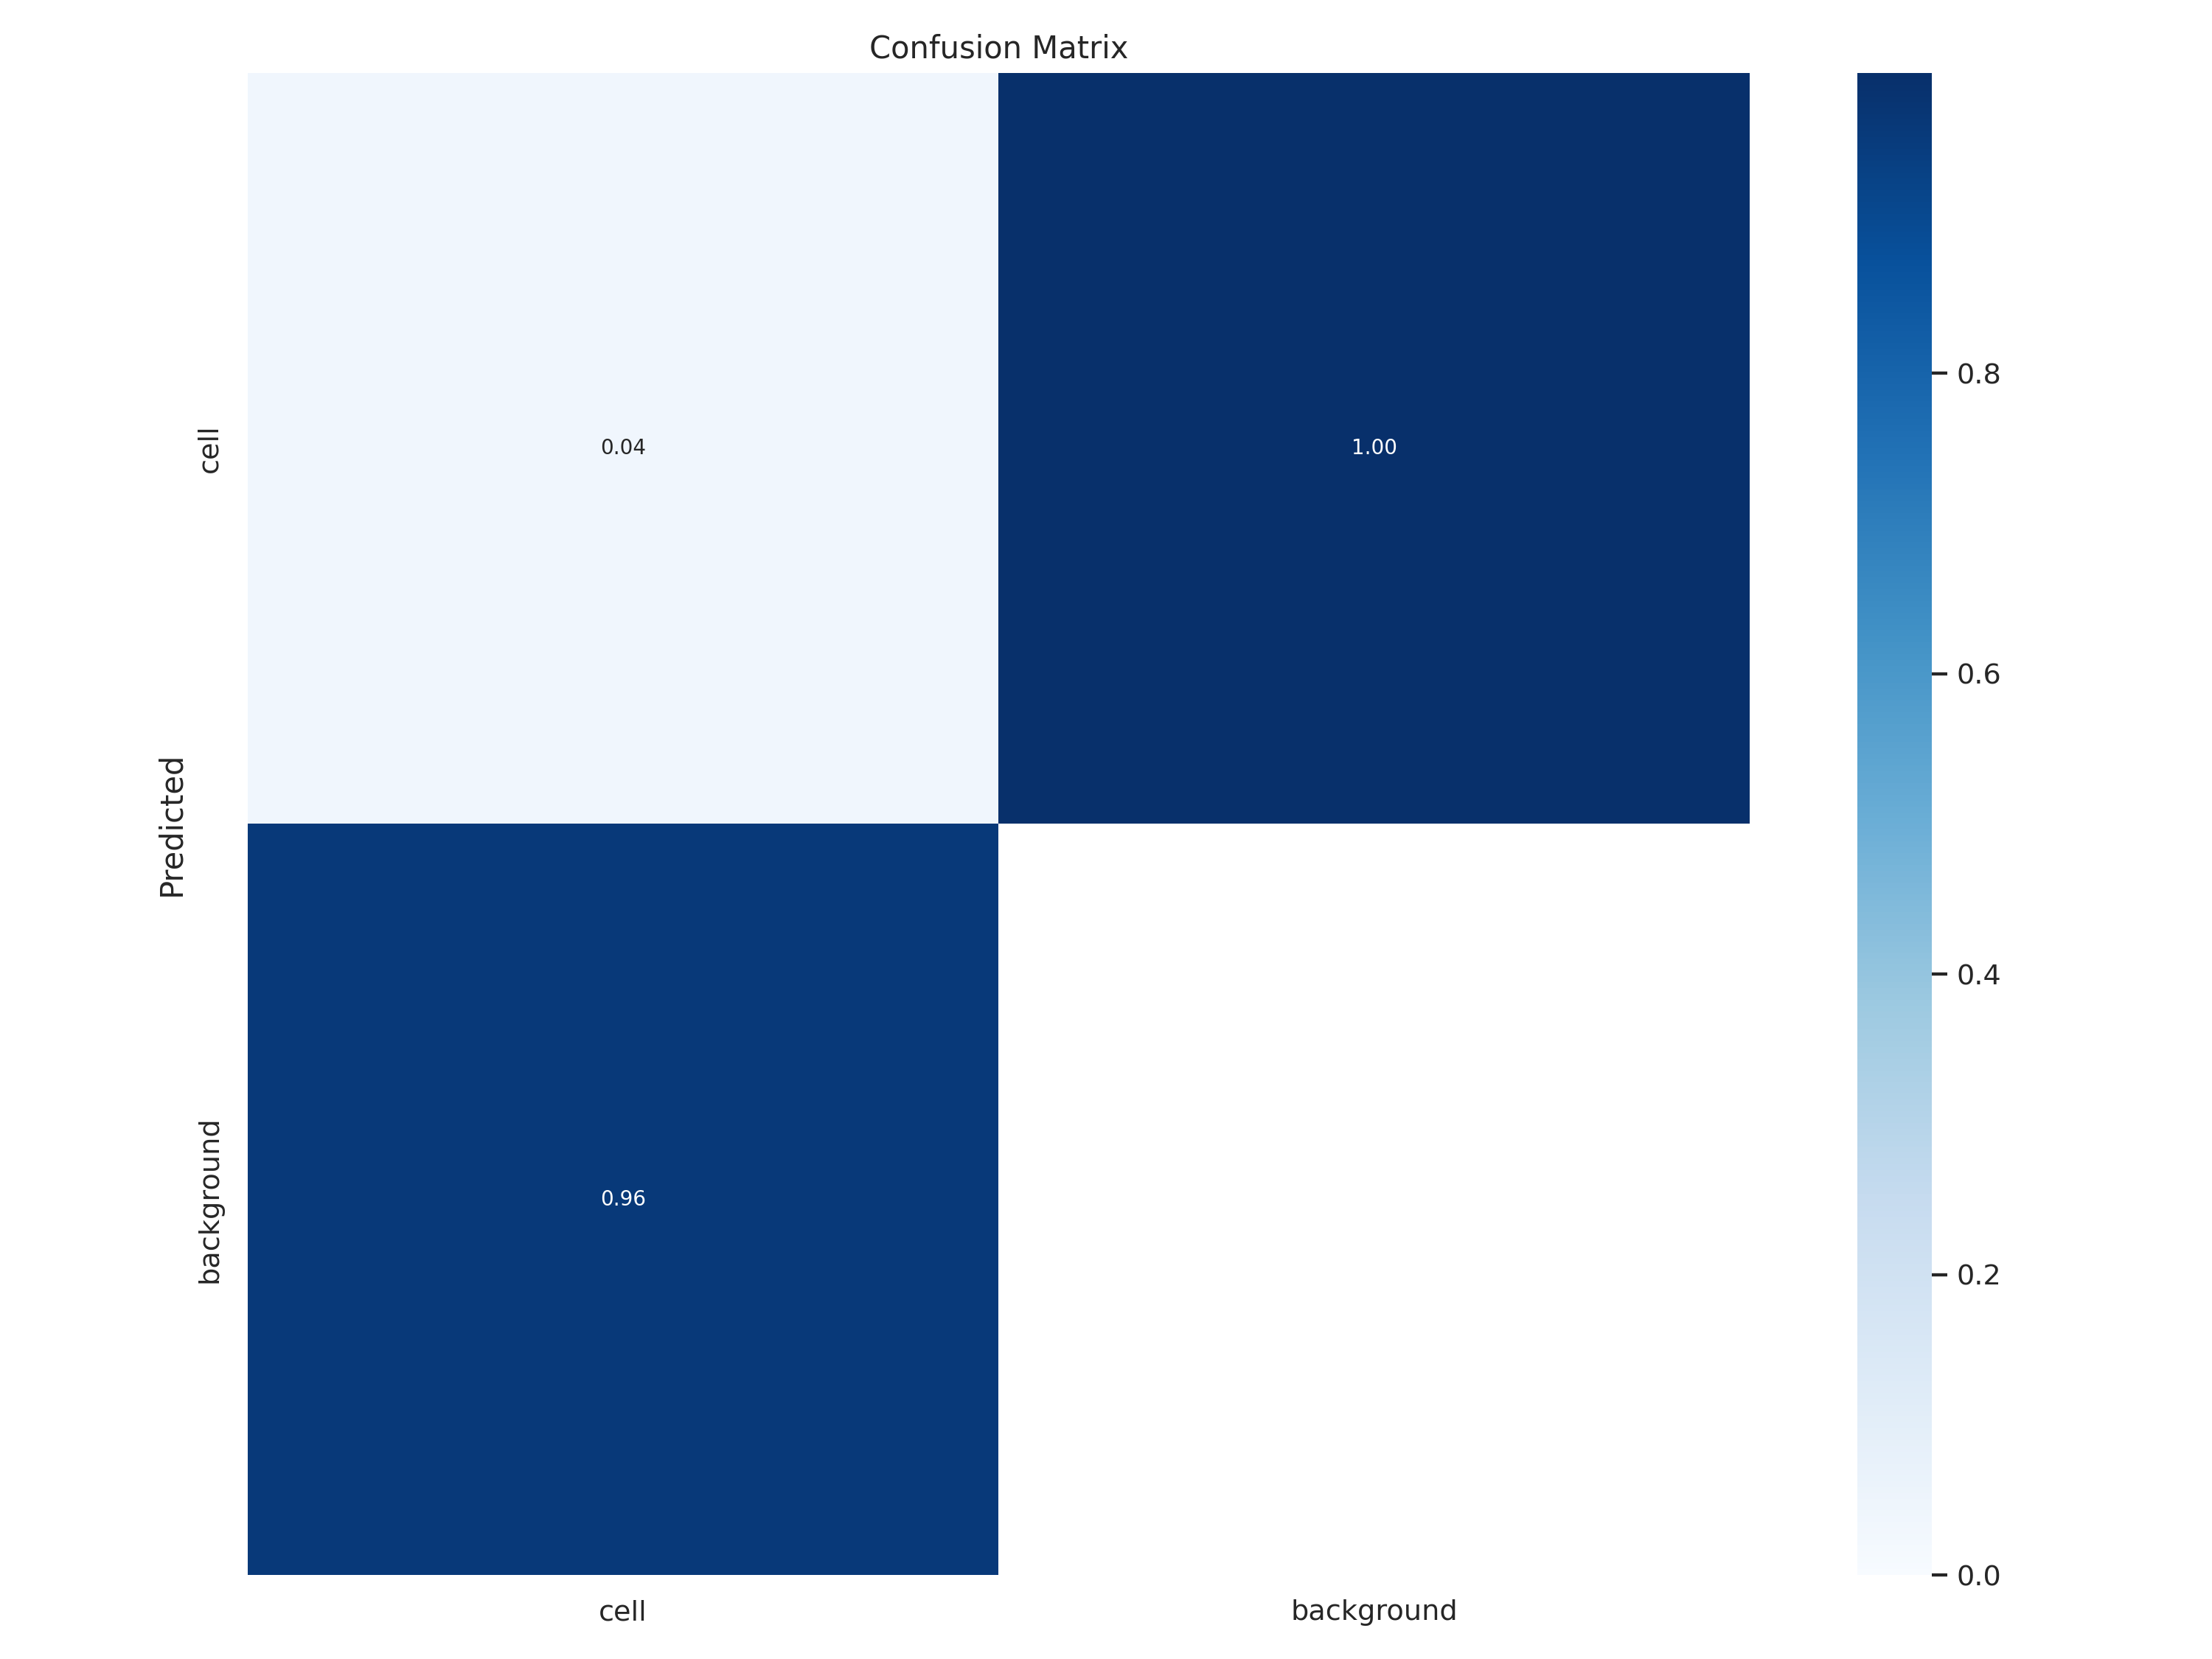

In [41]:
Image(f"/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset/runs/segment/train/confusion_matrix.png", width=600)

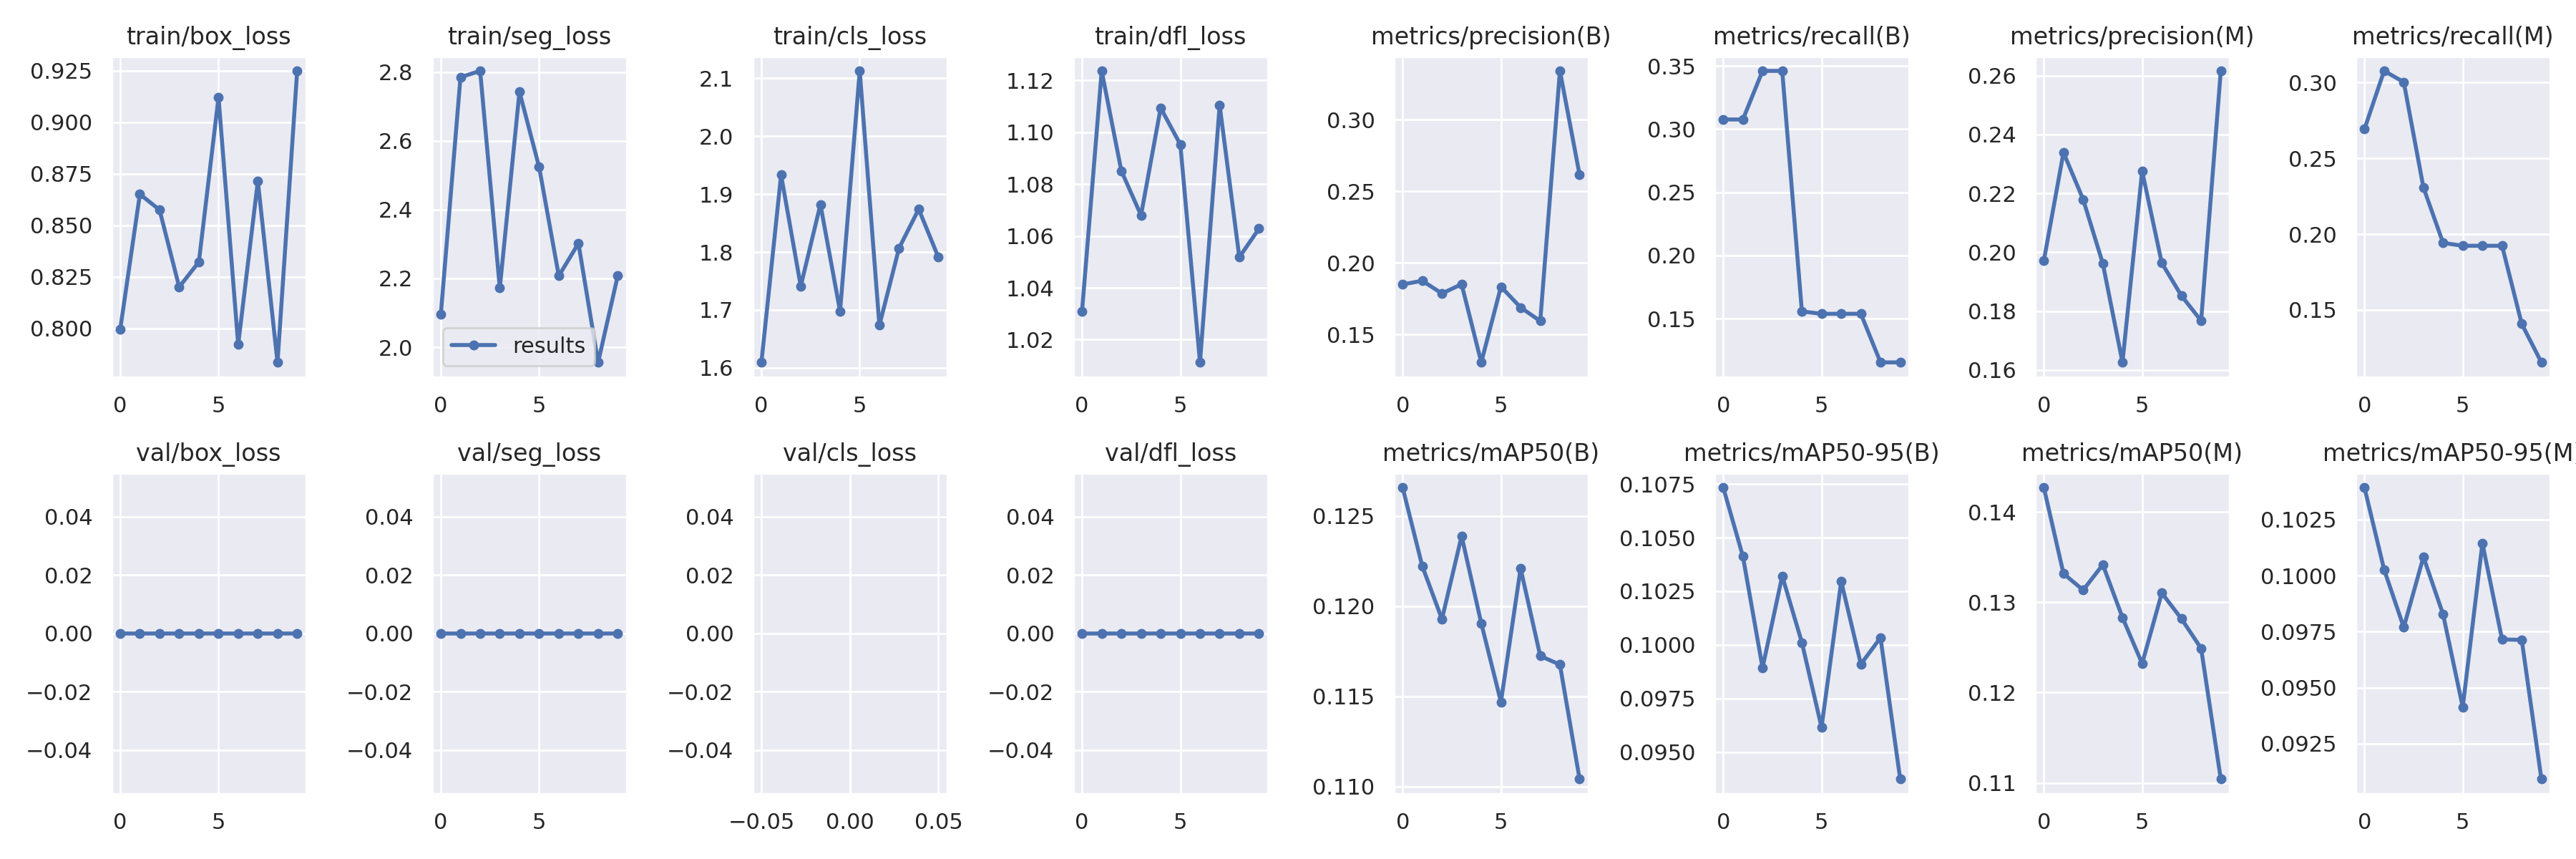

In [40]:
Image(filename=f'/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset/runs/segment/train/results.png', width=600)

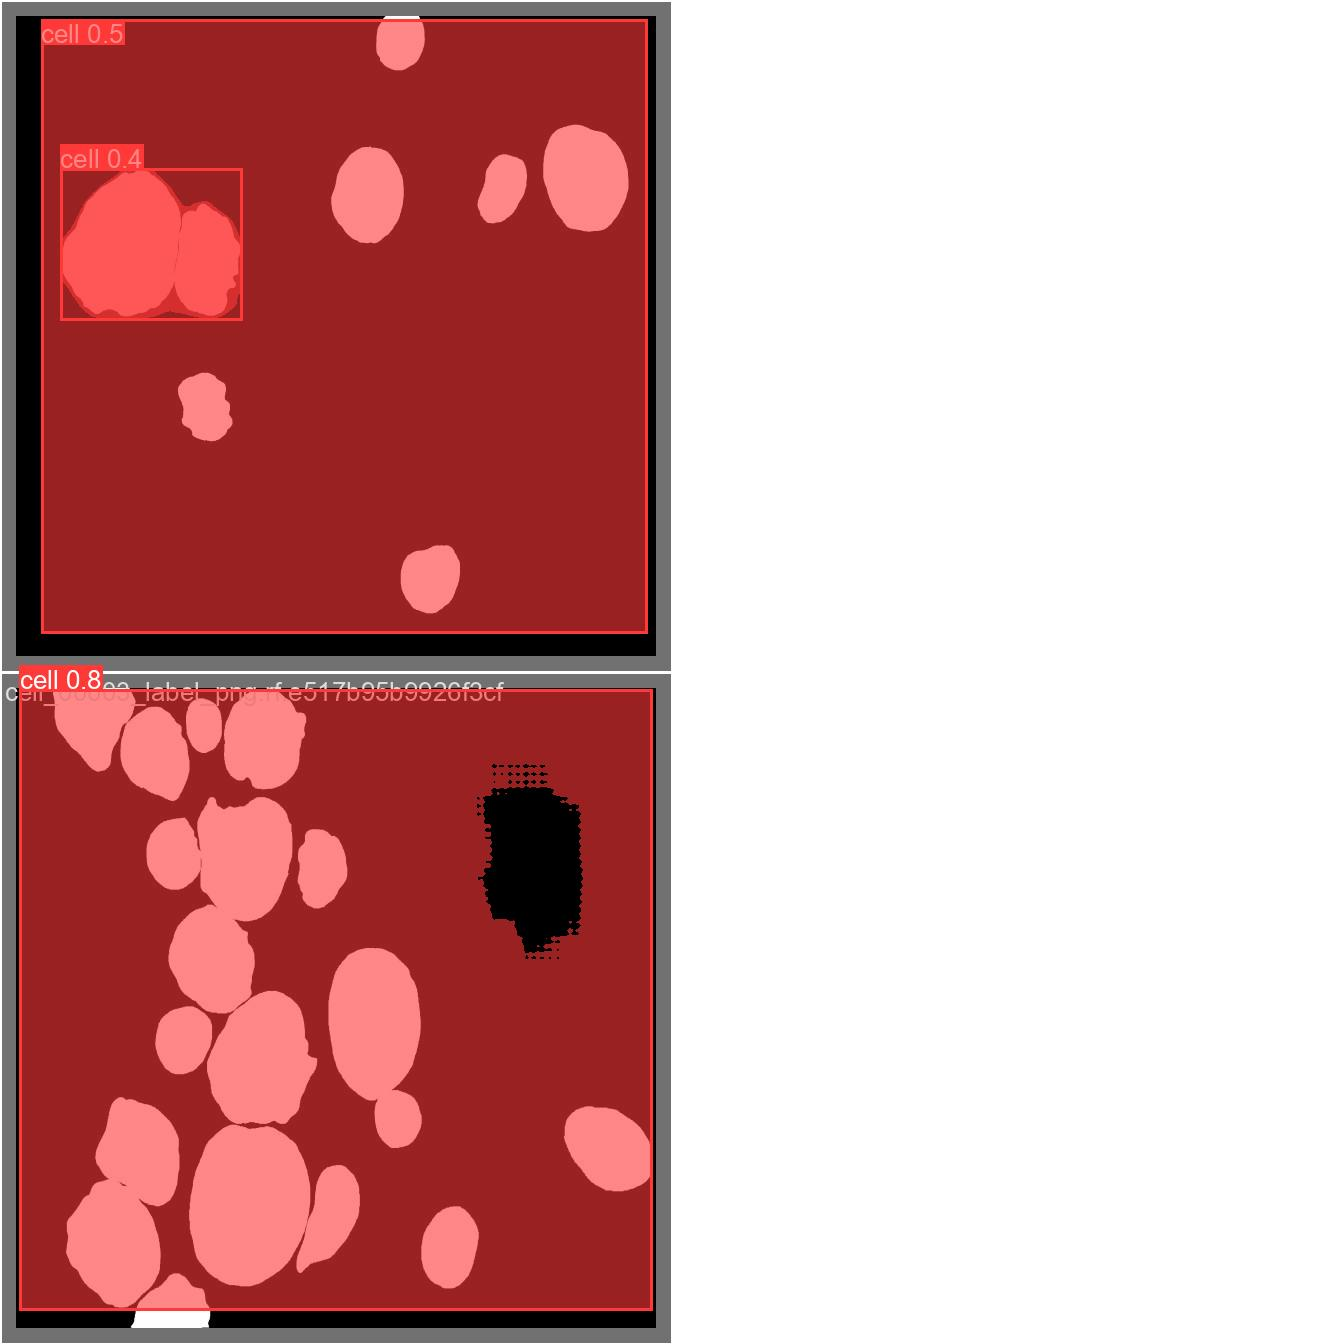

In [39]:
Image(filename=f'/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom model


In [26]:
%cd "/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset/"

/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset


In [38]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2024-02-13 11:42:05.034489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:42:05.034547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:42:05.035740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 11:42:06.053207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/Datas

## Inference with Custom Model


In [42]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Datasets/Dataset


In [46]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.50 source=test/images save=true

2024-02-13 11:55:53.355607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:55:53.355655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:55:53.356904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 11:55:54.389076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /conte

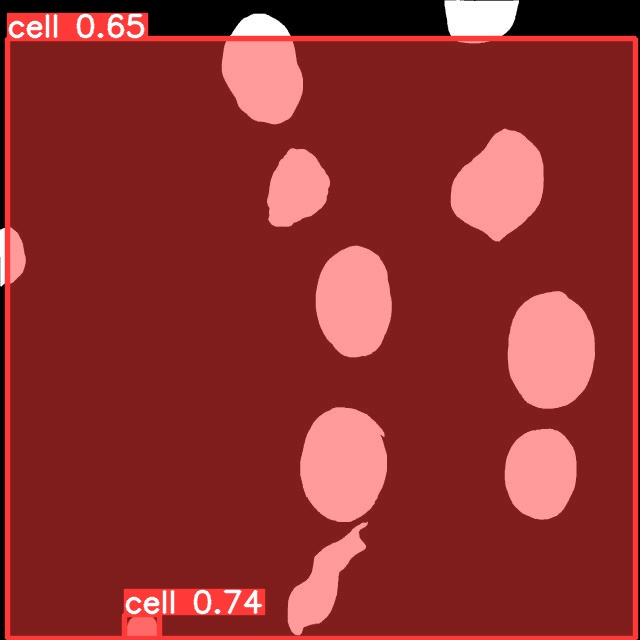

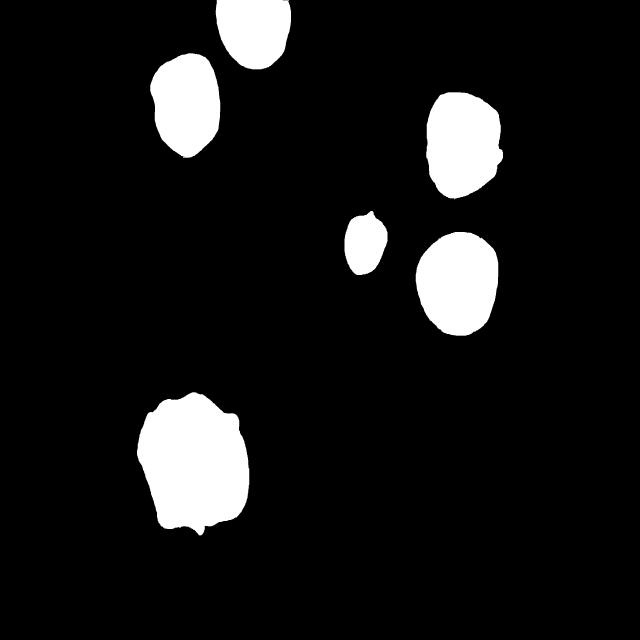

In [55]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'runs/segment/predict5/*.jpg')[:3]:
  display(Image(filename=image_path,height=600))
  print("\n")




In [ ]:
""